# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


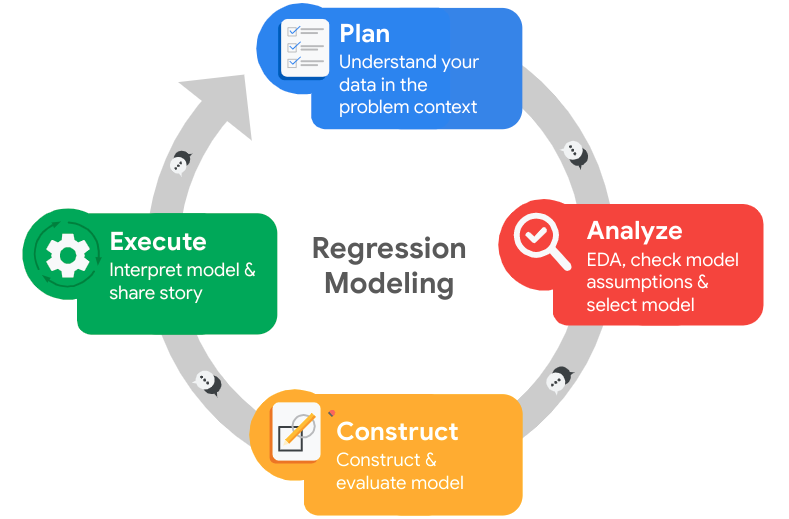

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?

The company as losing employees is very expensive.

- What are you trying to solve or accomplish?

We want to find out what factor is the most common when employees quit. We want to retain the employees.

- What are your initial observations when you explore the data?

We have approximately 9 columns that could help us predict whether an employee will leave (left) or not. I'm sure not all of these might be helpful but while we have it we might as well see what the model will predict and with what [insert metric here] will do as we are focused on false positives (since losing an employee is more costly than incentivizing them). We don't particularly care about false negatives for the same reason. 

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

I will be using the previous pace documents as well as previous models that were built and what I was thinking during that process. I'll also check stackoverflow, the pandas/python documentation, and random websites such as geeksforgeeks.org

- Do you have any ethical considerations in this stage?

Currently I do not, we are not using gender or age for our research/possible factors. We also are keeping identification numbers/names off of the data so that all entries are treated equally without bias.



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [140]:
# Import packages
#usual suspects - math and databases
import numpy as np
import pandas as pd

#plotting package, could also use seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

#Needed for building models and splitting the data to test/train/validate
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     PredefinedSplit)

#to plot and classify for Decision Tree Model
from sklearn.tree import (plot_tree, 
                          DecisionTreeClassifier)
#to evaluate models
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay)

#to classify Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#For classifier and importance plot for XGBoost Model
from xgboost import (XGBClassifier, 
                     plot_importance)

# This module lets us save our models once we fit them.
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [141]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [142]:
#categorical factor 1
df0['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [143]:
#categorical factor 2
df0['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [144]:
# Gather basic information about the data
df0.info()
# We have 10 columns, 14999 rows, and no missing values off the bat
# We have 2 floats, 6 ints, and 2 objects that will need to be converted (I believe)

#LEFT is == 1
#STAY is == 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [145]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [146]:
# Display all column names
#snake case is snake_case instead of Snake_Case or SnakeCase
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [147]:
# Rename columns as needed
df1 = df0.rename(columns={'Department':'department',
                         'Work_accident':'work_accident',
                         'average_montly_hours':'average_monthly_hours'})

# Display all column names after the update
df1.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [148]:
# Check for missing values
df1.isna().any(axis=1).sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [149]:
# Check for duplicates
### YOUR CODE HERE ###
df1.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [150]:
# Inspect some rows containing duplicates as needed
df1[df1.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [151]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df1.drop_duplicates()


# Display first few rows of new dataframe as needed
df.head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

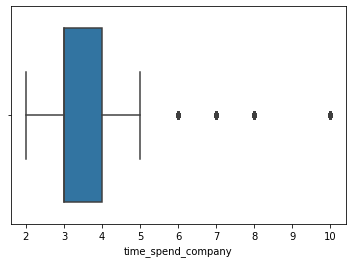

In [152]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x=df['time_spend_company'])


In [153]:
# Determine the number of rows containing outliers
#by checking the graph above
df[df['time_spend_company'] > 5].count()

#a better way is to use the iqr rule
quantile25 = df['time_spend_company'].quantile(0.25)
quantile75 = df['time_spend_company'].quantile(0.75)
iqr = quantile75 - quantile25
upperlimit, lowerlimit = quantile75 + 1.5*iqr , quantile25 - 1.5*iqr
print(f'{lowerlimit} - {upperlimit}')

1.5 - 5.5


In [154]:
df[(df['time_spend_company'] < lowerlimit) | (df['time_spend_company'] > upperlimit)].count()

satisfaction_level       824
last_evaluation          824
number_project           824
average_monthly_hours    824
time_spend_company       824
work_accident            824
left                     824
promotion_last_5years    824
department               824
salary                   824
dtype: int64

In [155]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6289e1350>,
      dtype=object)

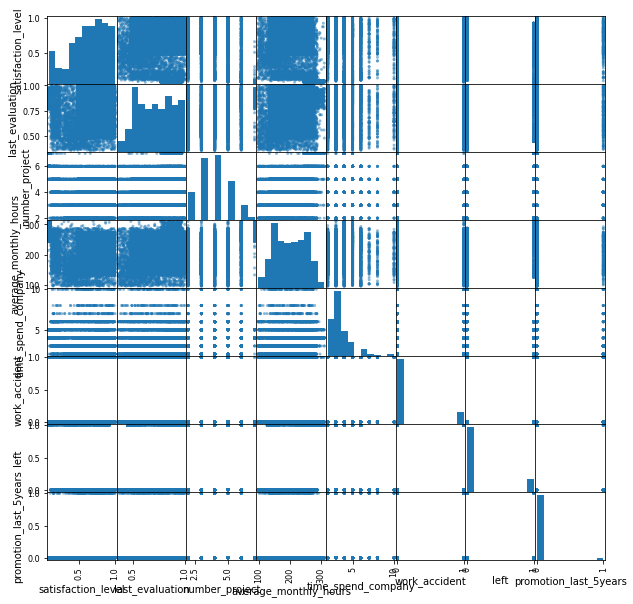

In [156]:
pd.plotting.scatter_matrix(df, figsize = (10,10))

There are 824 outliers found, our boxplot identificed anything outside of [2,5] years as an outlier.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. They currently have correlation below +/- 0.5 so I am assuming cross correlation is low.

2. The disbributions appear to be normally distributed for the most part (gaussian).

3. I need to transform categorical values into binary/values in order to create models.

4. Understanding the distributions and balance of the data in order to pick the correct metric and model to build based off of those. If we would not do some EDA we could be assuming situations and the model would not behave as expected or could even have large false pos/false negs.

5. I am using the previous labs as well as the internet (geeksforgeeks, pandas documentation, stackoverflow)

6. I do not think since we still have no personally identifiable labels as well as gender being excluded. Each trial should be treated equally from that.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [157]:
# Get numbers of people who left vs. stayed
df['left'].value_counts()

left = df['left'].value_counts()[1]
stay = df['left'].value_counts()[0]

# Get percentages of people who left vs. stayed
print(f'Left Percentage {(left/(left+stay) * 100).round(2)}%')
print(f'Stay Percentage {(stay/(left+stay) * 100).round(2)}%')
print('This would show that the data is unbalanced, we will need both accuracy and recall.')

Left Percentage 16.6%
Stay Percentage 83.4%
This would show that the data is unbalanced, we will need both accuracy and recall.


In [158]:
#Lets convert the two categorical columns left to numerical
salary_map = {'low':1,
             'medium':2,
             'high':3}

df['salary'] = df['salary'].map(salary_map)

df_full = pd.get_dummies(df, columns = ['department'])



In [159]:
df_full.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.029241,0.005382,-0.002552,-0.021056,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.015775,-0.002885,-0.005448,0.007244,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.000502,-0.001464,0.010077,0.006286,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,-0.000551,0.001007,0.004159,0.001938,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.038164,-0.003233,-0.008380,0.006910,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.000058,-0.009777,0.011793,-0.009178,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.118882,-0.003324,-0.029016,0.005955,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.087851,-0.034334,0.025610,-0.001497,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502
salary,0.029241,-0.015775,-0.000502,-0.000551,0.038164,-0.000058,-0.118882,0.087851,1.000000,-0.008814,-0.000048,0.007692,-0.011977,0.113304,0.010596,-0.010873,-0.009728,-0.007180,-0.027938
department_IT,0.005382,-0.002885,-0.001464,0.001007,-0.003233,-0.009777,-0.003324,-0.034334,-0.008814,1.000000,-0.073779,-0.069566,-0.068377,-0.057822,-0.072586,-0.073326,-0.181086,-0.125958,-0.142826


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

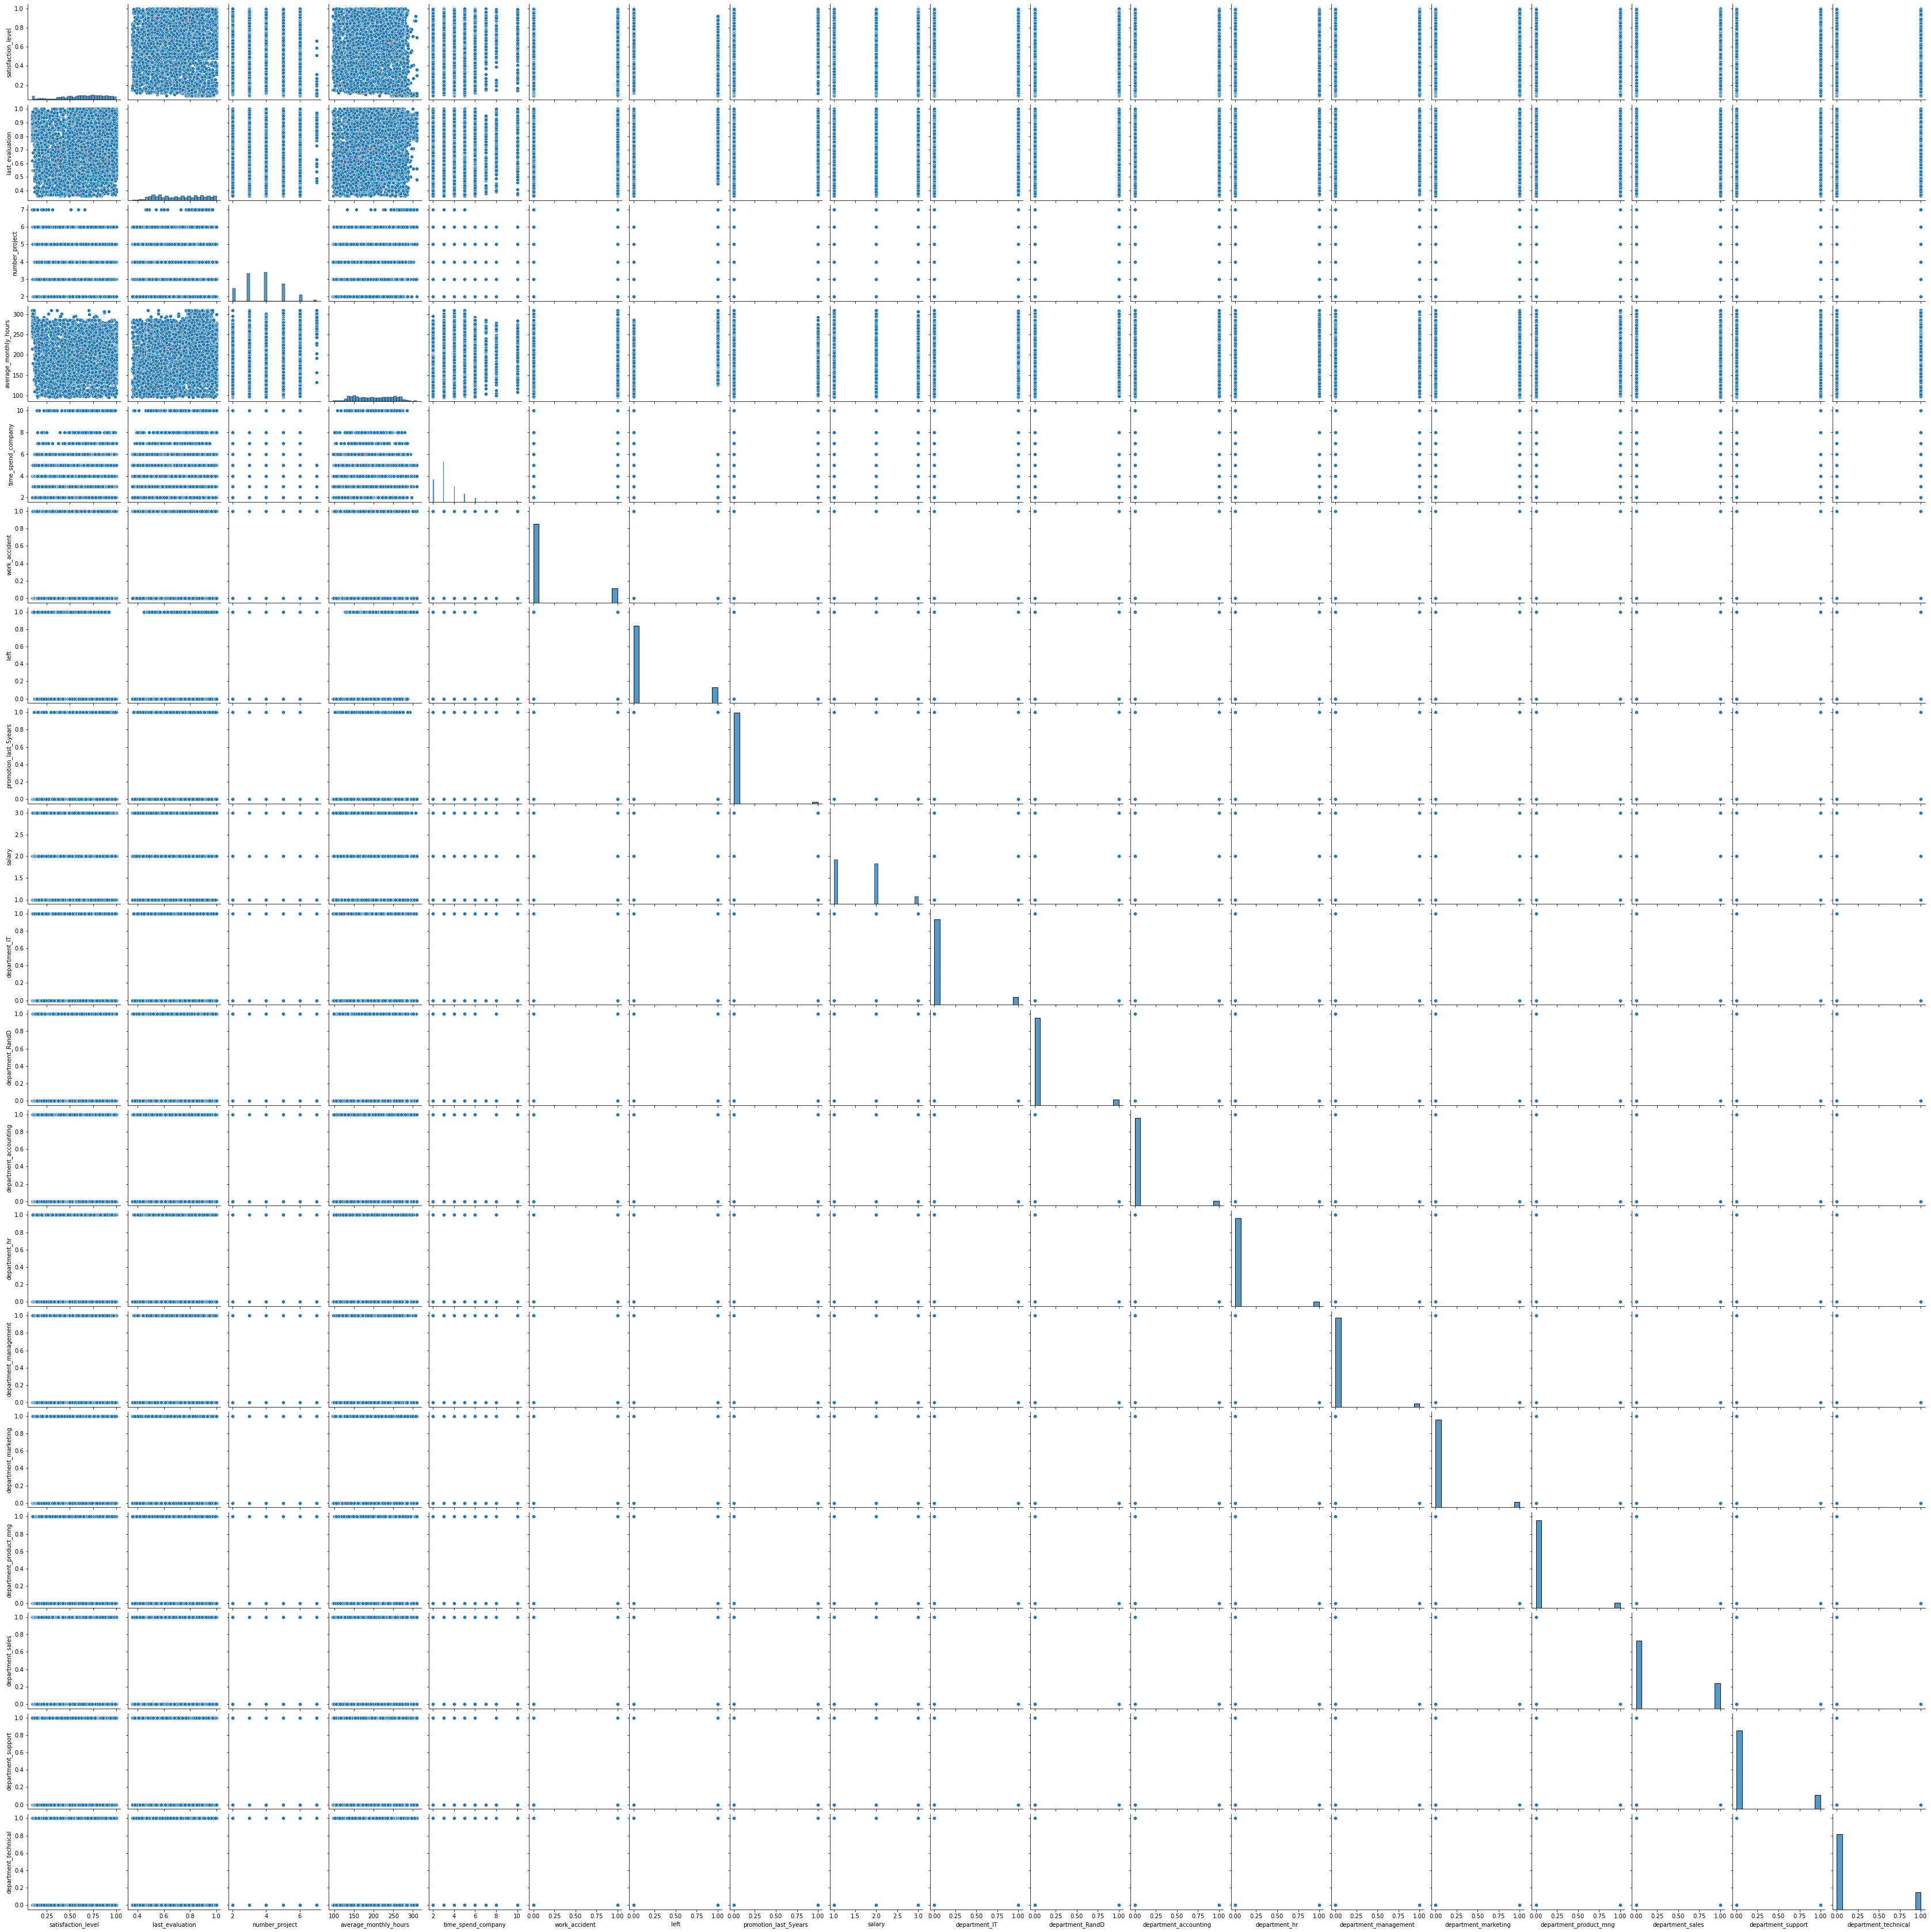

In [160]:
import seaborn as sns
sns.pairplot(df_full)

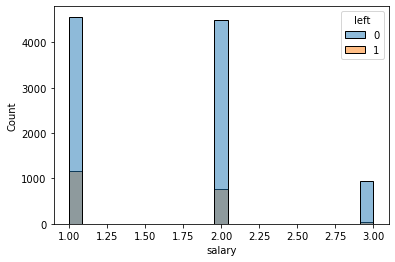

In [161]:
# salary

sns.histplot(x=df_full['salary'], hue = df_full['left'])
#It would appear that those who are paid in the lowest leave at the highest rate,
#and nobody in the upper tier left at all.

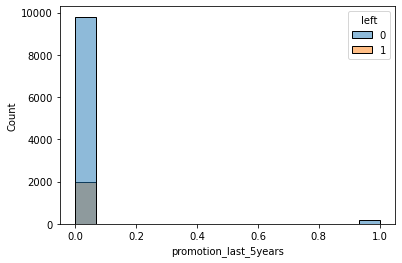

In [162]:
# Promotion last 5 years
sns.histplot(x=df_full['promotion_last_5years'], hue = df_full['left'])
#Well I didn't realize how few employees were promoted in the last 5 years, but hey the ones that do
#didn't leave

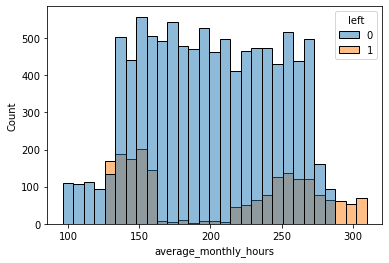

In [163]:
# Create a plot as needed
sns.histplot(x=df_full['average_monthly_hours'], hue = df_full['left'])
#although it's bimodal, it would appear those who work the most hours left at a faster rate, 
#and those who were given just a bit more than the absolute least amount were leaving too

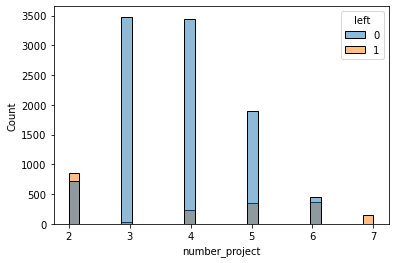

In [164]:
# Create a plot as needed
sns.histplot(x=df_full['number_project'], hue = df_full['left'])
#those with very few projects or too many have left. Looks like 2projs is bad and above 6

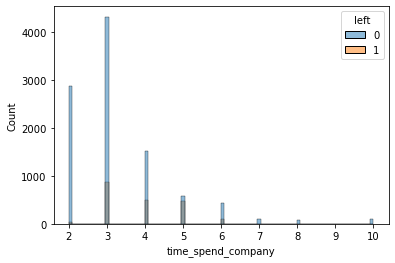

In [165]:
# Create a plot as needed
sns.histplot(x=df_full['time_spend_company'], hue = df_full['left'])
#Those who are new or have been for a long time seem to stay, but that intermediate range has seen
#some people leave... perhaps they are doing the most work?

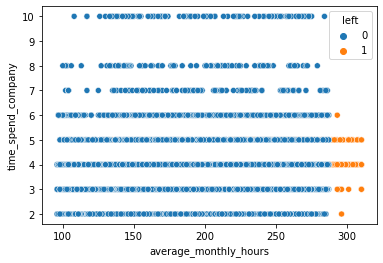

In [166]:
sns.scatterplot(x = df_full['average_monthly_hours'], y = df_full['time_spend_company'], hue = df_full['left'])
#This also shows that th ose in that range of 3-6 years are the ones more often working the most hours
#nobody above 6 years is working above 300 hours, consequently nobody above 6 years have left 

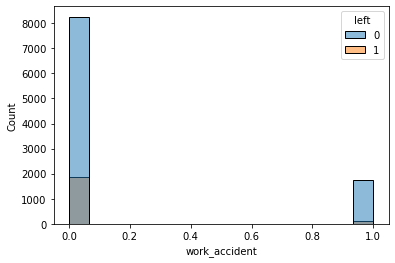

In [167]:
# Create a plot as needed
sns.histplot(x=df_full['work_accident'], hue = df_full['left'])

### Insights

I put these below each graph:
1. It would appear that those who are paid in the lowest leave at the highest rate, and nobody in the upper tier left at all.

2. Well I didn't realize how few employees were promoted in the last 5 years, but hey the ones that do didn't leave

3. although it's bimodal, it would appear those who work the most hours left at a faster rate,  and those who were given just a bit more than the absolute least amount were leaving too

4. those with very few projects or too many have left. Looks like 2projs is bad and above 6

5. Those who are new or have been for a long time seem to stay, but that intermediate range has seen some people leave... perhaps they are doing the most work?

6. This also shows that th ose in that range of 3-6 years are the ones more often working the most hours nobody above 6 years is working above 300 hours, consequently nobody above 6 years have left 

7. Work accident doesn't seem to affect the churn. Sure, those who had an accident are still with the company, but these might be still with them because they are hurt and recovering.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?

We had a lot of duplicate values that accounted for about 20% of the data. We have some significant outliers that would skew regression models. 
- Which independent variables did you choose for the model and why?

Independent will be left, we will use the rest of the categories as dependent variables.

- Are each of the assumptions met?


- How well does your model fit the data?


- Can you improve it? Is there anything you would change about the model?


- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

The projects I have done before this, the notes, and the same websites.

- Do you have any ethical considerations in this stage?

I'm starting to wonder if we should include employees who were injured at work, but I still don't believe it is an ethical violation as it doesn't identify the individuals nor could draw a harmful conclusion.

[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

What features affect the employees decision to stay or leave more?

### Identify the types of models most appropriate for this task.

Since its unbalanced and has outliers, I am going to go with the three types of machine learning models: split tree, random forest, and xgboost.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [168]:
df_full.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
time_spend_company          int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                      int64
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [169]:
#Defining our dependent and independent variables

y = df_full['left']

x = df_full.drop('left', axis = 1)

In [170]:
#Will be using this later

def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

In [171]:
#I'm also going to grab this to gather up the info that we will get from the models built.

def make_results(model_name, model_object):
    
    # Get all the results from the CV and put them in a df    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
    
    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    auc = best_estimator_results.mean_test_roc_auc
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                         'F1': [f1],
                         'Recall': [recall],
                         'Precision': [precision],
                         'Accuracy': [accuracy],
                         'AUC': [auc]})
    return table

DECISION TREE

In [172]:
#splitting into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.25,
                                                   stratify = y,
                                                   random_state = 42)

In [173]:
#Fitting model to data

decision_tree = DecisionTreeClassifier(random_state = 0)

decision_tree.fit(x_train, y_train)

decision_tree_pred = decision_tree.predict(x_test)

In [174]:
print("Accuracy:", "%.3f" % accuracy_score(y_test, decision_tree_pred))
print("Precision:", "%.3f" % precision_score(y_test, decision_tree_pred))
print("Recall:", "%.3f" % recall_score(y_test, decision_tree_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, decision_tree_pred))
print("AUC Score:", "%.3f" % roc_auc_score(y_test, decision_tree_pred))

Accuracy: 0.969
Precision: 0.898
Recall: 0.916
F1 Score: 0.907
AUC Score: 0.947


Accuracy and Recall are both very good: 96.9% and 91.6%

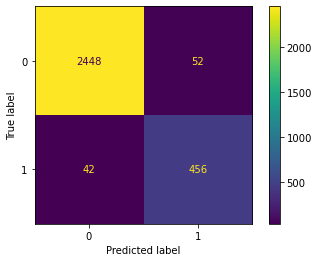

In [175]:
conf_matrix_plot(decision_tree, x_test, y_test)

We have a very good ratio of true positive/true negative to false pos/false neg which is what we wanted in the model. The model also seems to err on the side of false positives more than false negatives which was also sought after as false positives are considerably cheaper than false negatives.

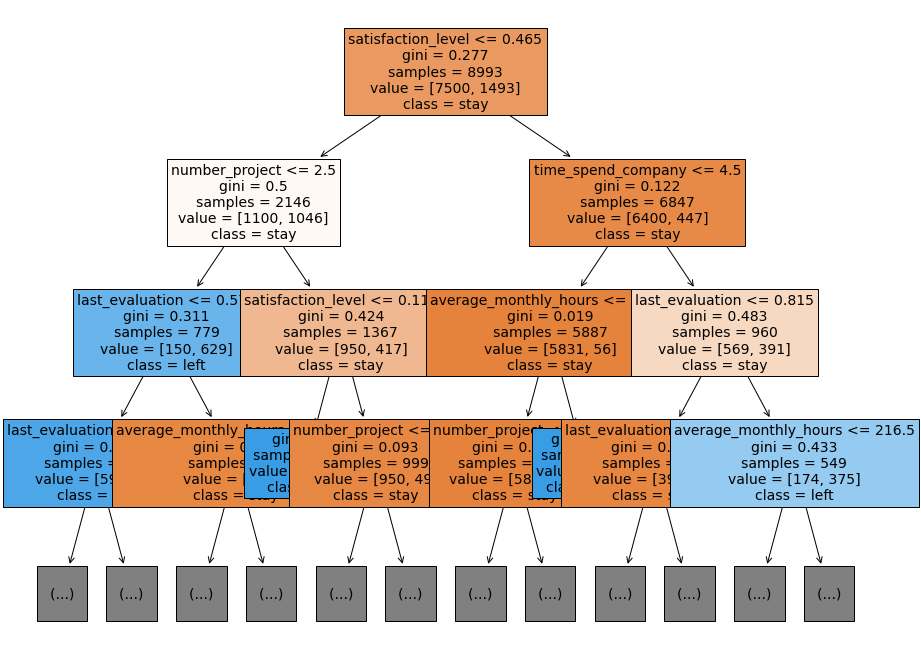

In [176]:
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=x.columns, 
          class_names={0:'stay', 1:'left'}, filled=True);
plt.show()

In [177]:
#Lets Tune it
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [178]:
tuned_decision_tree = DecisionTreeClassifier(random_state = 0)

clf = GridSearchCV(tuned_decision_tree,
                  tree_para,
                  scoring = scoring,
                  cv = 5,
                  refit = 'roc_auc')

clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15

In [179]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [180]:
clf.best_score_
#dang that's pretty good!

0.9737695704548346

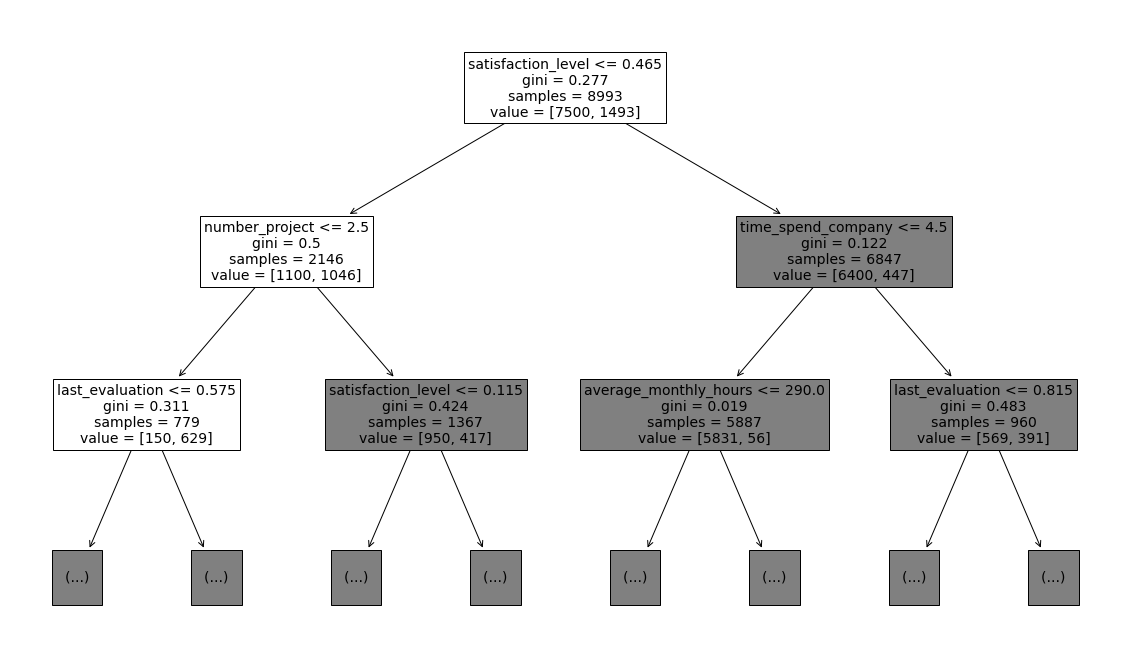

In [181]:
#Best tree
plt.figure(figsize = (20,12))
plot_tree(clf.best_estimator_, max_depth = 2, fontsize = 14, feature_names = x.columns)
plt.show()

So our biggest factors that the tuned decision tree came up with were:
    satisfaction_level or the employees reported satisfaction
    number_project or the number of projects
    time_spend_company or the years that employee has been with the company

In [182]:
result_table = make_results('Tuned Decision Tree', clf)
result_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Tuned Decision Tree,0.946221,0.919616,0.974618,0.982653,0.962888


RANDOM FOREST

In [192]:
#split the data into its sets

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.25,
                                                   stratify = y,
                                                   random_state = 42)

x_tr, x_val, y_tr, y_val = train_test_split(x_train,
                                           y_train,
                                           test_size = 0.2,
                                           stratify = y_train,
                                           random_state = 42)

In [193]:
#setting parameters and instantiating the model
cv_params = {'n_estimators' : [50, 100],
             'max_depth' : [10, 50],
             'min_samples_leaf' : [0.5, 1],
             'min_samples_split' : [0.001, 0.01],
             'max_features' : ['sqrt'],
             'max_samples' : [0.5, 0.9]}

split_index = [0 if x in x_val.index else -1 for x in x_train.index]

rf = RandomForestClassifier(random_state = 0)

#custom_split = PredefinedSplit(split_index)

In [195]:
#random forest model
rf_val = GridSearchCV(rf,
                     cv_params,
                     cv = 4,
                     refit = 'roc_auc')
rf_val.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [196]:
print(rf_val.best_score_)
print(rf_val.best_params_)

0.9826531740480942
{'max_depth': 50, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 100}


In [197]:
#Create the optimal random forest model
rf_optimal = RandomForestClassifier(max_depth = 50,
                                    max_features = 'sqrt',
                                    max_samples = 0.9,
                                    min_samples_leaf = 1,
                                    min_samples_split = 0.001,
                                    n_estimators = 100,
                                    random_state = 0)
rf_optimal.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [202]:
y_predict = rf_val.predict(x_test)

In [203]:
precision = precision_score(y_test,
               y_predict,
               pos_label = 0)

recall = recall_score(y_test,
            y_predict,
            pos_label = 0)

accuracy = accuracy_score(y_test,
              y_predict)

f1 = f1_score(y_test,
        y_predict,
        pos_label= 0)

auc = roc_auc_score(y_test, y_predict)

In [204]:

result_table = result_table.append({'Model': 'Random Forest Optimal Model',
                                           'F1': f1,
                                           'Accuracy': accuracy,
                                           'Precision': precision,
                                           'Recall': recall,
                                           'AUC' : auc},
                                          ignore_index = True)

In [205]:
result_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Tuned Decision Tree,0.946221,0.919616,0.974618,0.982653,0.962888
1,Random Forest Optimal Model,0.991460,0.998400,0.984615,0.985657,0.960043
2,Random Forest Optimal Model,0.991460,0.998400,0.984615,0.985657,0.960043
3,Random Forest Optimal Model,0.991460,0.998400,0.984615,0.985657,0.960043


In [207]:
rf_val.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

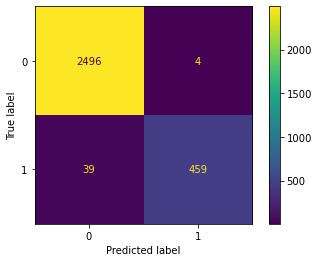

In [114]:
conf_matrix_plot(rf_optimal, x_test, y_test)

In [218]:
tuned_tree_importance = pd.DataFrame(rf_val.best_estimator_.feature_importances_, columns = ['gini importance'], index = x.columns)
tuned_tree_importance.sort_values(by='gini importance', ascending=False).head(3)

,gini importance
satisfaction_level,0.335503
number_project,0.200727
time_spend_company,0.170121


XGBOOST MODEL

In [115]:
#I can use the same train test split for this one, so straight to instantiating XGBclassifier
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

In [122]:
#Using similar cv_params as before

cv_params = {'max_depth': [3,4,5,6],
             'min_child_weight': [3,4,5],
             'learning_rate': [0.1, 0.2],
             'n_estimators': [75, 100],
             'subsample': [0.10, 0.25, 0.40, 0.65],     #I did multiples of 15, we should need less than half
             'colsample_bytree': [0.45, 0.5]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [123]:
xgb_cv = GridSearchCV(xgb,
                     cv_params,
                     scoring = scoring,
                     cv = 5,
                     refit = 'roc_auc')

In [124]:
#The very long fitting cell...
xgb_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.45, 0.5],
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 4, 5, 6],
                         'min_child_weigh

In [125]:
#save the model cell, do this after doing above so you don't have to rerun above
path = '/home/jovyan/work/'

with open(path+'xgb_cv_model_final_adam.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

In [126]:
y_predict = xgb_cv.predict(x_test)

In [127]:
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy score final XGB model: ', accuracy)

precision = precision_score(y_test, y_predict)
print('Precision score final XGB model: ', precision)

recall = recall_score(y_test, y_predict)
print('Recall score final XGB model: ', recall)

f1 = f1_score(y_test, y_predict)
print('F1 score final XGB model: ', f1)

auc = roc_auc_score(y_test, y_predict)
print('AUC score final XGB model: ', auc)

Accuracy score final XGB model:  0.9819879919946631
Precision score final XGB model:  0.9683544303797469
Recall score final XGB model:  0.9216867469879518
F1 score final XGB model:  0.9444444444444444
AUC score final XGB model:  0.9578433734939759


In [128]:
result_table = result_table.append({'Model': 'XGB Model',
                                           'F1': f1,
                                           'Accuracy': accuracy,
                                           'Precision': precision,
                                           'Recall': recall,
                                           'AUC' : auc},
                                          ignore_index = True)

In [129]:
result_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Tuned Decision Tree,0.946221,0.919616,0.974618,0.982653,0.962888
1,Random Forest Optimal Model,0.991460,0.998400,0.984615,0.985657,0.960043
2,XGB Model,0.944444,0.921687,0.968354,0.981988,0.957843


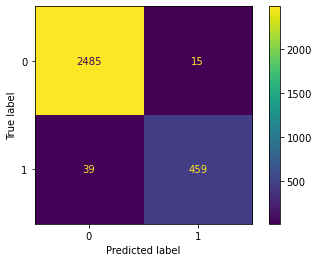

In [130]:
conf_matrix_plot(xgb_cv, x_test, y_test)

This confusion matrix is showing something interesting, although the recall was higher than the tuned decision tree, the ratio of false negatives to false positives has increased, whereas we want to err on the side of false positives since they are cheaper in the grand scheme of things.

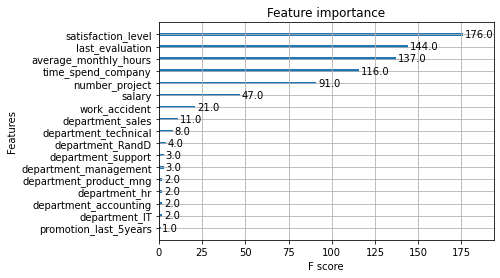

In [131]:
plot_importance(xgb_cv.best_estimator_)

I would use either the second or first model for this one, they seem to have the highest accuracy, auc, and recall. However the first one seems to do better with false negatives than the random forest model, the increase in auc and recall cannot be beat in the random_forst_model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Satisfaction, number of projects, and length of time the employee is with the company all have been identified as the most impactful features. This differs slightly from the xgb model created that highlighted satisfaction, last evaluation, and average monthly hours to be the most impactful which followed some of the EDA that we did. Because of the higher rating of the second model, the random forest model, we will use this one to go from but keep in mind that the others identified within xgb model are still possibly relevant.

2 and 3. An employees satisfaction should be kept in mind, this could be helped by either keeping up with the employee and their survays. The employer needs to be mindful of the number of projects assigned to an employee, as too many or too few burn out or lose the interet of the employee. Finally something that might need highlighted is that employees that have stayed with the company/have a longer tenure are happier and more stable than newer highers which leads me to question if something is happening to the new hires that would be causing them to leave, is it too many projects, is it better working conditions, perhaps they are in an industry that cause them to hop more often. Salary wasn't in the top3 but was in the top 6 in all of the models suggesting perhaps the new hires are leaving to get a raise.

4. The model could be improved by feature engineering as well as figuring out why a good chunk (20%) of the data is duplicated and had to be dropped. 

5. How is satisfaction measured, is that a full blown survey or is that "on a scale of 1 to 10 how happy are you"

6 + 7. No change, buncha old docs from the courses, buncha examples, the internet. No ethical considerations especially since accident was not one of the prominent features affecting churn.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.